In [53]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
with open("data/explore_expn_sigma_e/master_df_parsed.pickle", "rb") as x:
    df = pickle.load(x)

# Mark runs with speciation according to the 15 decade criteria
df['speciation_bool'] = df['speciation_ybp'].notna()

# Calculate time_to_speciation
df['time_to_speciation'] = 30000 - df['speciation_ybp']

In [55]:
grouped_df = df.groupby(['expn_sigma_e', 'mate_pref', 'food_scheme'])['speciation_bool'].mean()

KeyError: 'speciation_bool'

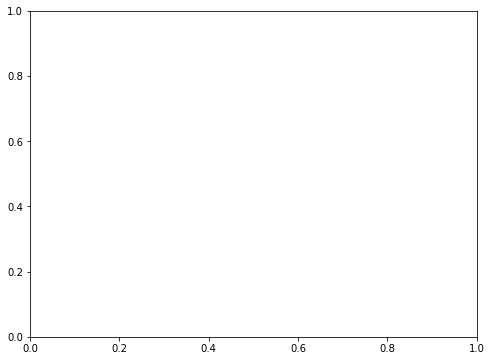

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(grouped_df.index, grouped_df['speciation_bool'], c=grouped_df['mate_pref'])
ax.set_xlabel(r'$\log_{10}(\sigma_e)$', fontsize=15, labelpad=20)
ax.set_ylabel('Speciation Percent', fontsize=15, labelpad=10)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

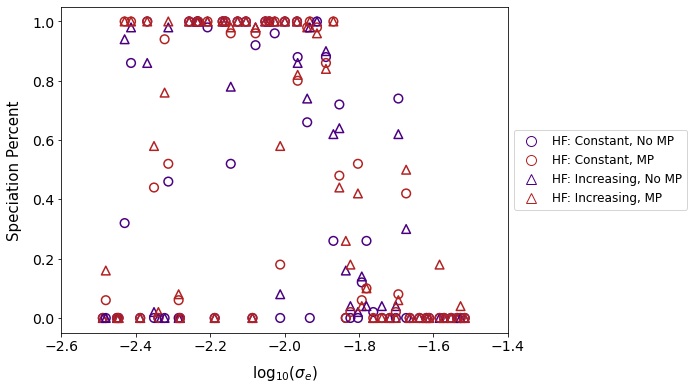

In [103]:
x = grouped_df.index.get_level_values('expn_sigma_e')
y = grouped_df.values
mate_pref = grouped_df.index.get_level_values('mate_pref')
food_scheme = grouped_df.index.get_level_values('food_scheme')

# Define marker styles based on 'food_scheme'
marker_styles = {'constant': 'o', 'increasing': '^'}  # Add more styles if needed

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(x)):
    color = 'firebrick' if mate_pref[i] else 'indigo'  # Color based on 'mate_pref'
    marker = marker_styles[food_scheme[i]]  # Marker style based on 'food_scheme'
    ax.scatter(x[i], y[i], color=color, marker=marker, s=75, facecolor='none', linewidths=1.5)
    
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='indigo', markerfacecolor='none', markersize=10, linestyle='none', markeredgecolor='indigo', label='HF: Constant, No MP'),
    plt.Line2D([0], [0], marker='o', color='firebrick', markerfacecolor='none', markersize=10, linestyle='none', markeredgecolor='firebrick', label='HF: Constant, MP'),
    plt.Line2D([0], [0], marker='^', color='indigo', markerfacecolor='none', markersize=10, linestyle='none', markeredgecolor='indigo', label='HF: Increasing, No MP'),
    plt.Line2D([0], [0], marker='^', color='firebrick', markerfacecolor='none', markersize=10, linestyle='none', markeredgecolor='firebrick', label='HF: Increasing, MP')
]

ax.legend(handles=legend_elements, fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(r'$\log_{10}(\sigma_e)$', fontsize=15, labelpad=10)
ax.set_ylabel('Speciation Percent', fontsize=15, labelpad=10)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlim(-2.6, -1.4)

# Display the plot
plt.savefig('figures/explore_expn_sigma_e.pdf',  bbox_inches='tight')